<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Parcial2/Punto_3_Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

In [ ]:
# @title Instalación de librerias

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
datos = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(datos)

In [ ]:
# @title Obtencion de datos
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR',
           'IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [ ]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},Ytest {Ytest.shape}")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),Ytest (360,)


Gráfica de la señal promedio respecto al tiempo.
Tomamos las señales en el vector de Xtrain, tiene 840 señales con 4000 muestras cada una. Sacamos el promedio de las 840 señales y queda un vector con las 4000 muestras de 1 sola señal.
El vector de tiempo se toma desde 0 hasta el periodo de todas las señales (que mas arriba se ve que es 0.333[s]) y con las mismas 4000 muestras o divisiones que se requieren.

Text(0.5, 1.0, 'Gráfica en tiempo')

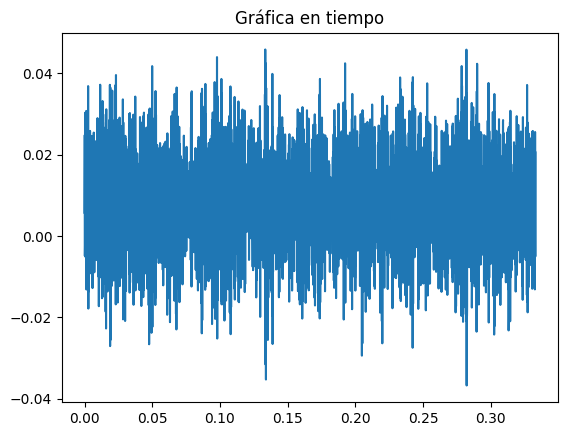

In [ ]:
XT = np.mean(Xtrain,axis=0)
vt = np.linspace(0,0.333,4000)
plt.plot(vt,XT)
plt.title('Gráfica en tiempo')

Cálculo de las transformadas, un vector de frecuencias (vf) en base al número de muestras en el arreglo de los datos de entrenamiento (4000) y un vector de señales transformadas (Xw) con las señales de entrenamiento.

In [ ]:
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #vector frecuencias
Xw = np.fft.rfft(Xtrain) # FFT de train

vf2 = np.fft.rfftfreq(Xtest.shape[1],1/Fs)
Xw2 = np.fft.rfft(Xtest) # FFT de test

Para la gráfica de la señal promedio en frecuencia, tomamos todos los valores de la FFT de Xtrain almacenados en Xw y los promediamos con np.mean para obtener una sola señal promedio con 2001 muestras. El vector de frecuencias no cambia.

Text(0.5, 1.0, 'Gráfica en frecuencia')

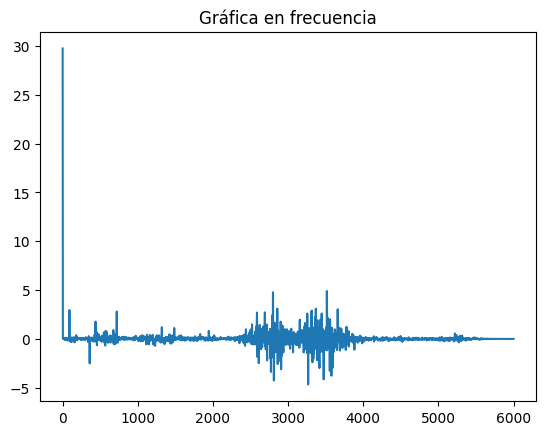

In [ ]:
XF = np.mean(Xw,axis=0)
plt.plot(vf,XF)
plt.title('Gráfica en frecuencia')

In [ ]:
Xw = Xw/np.sqrt(np.sum(Xw**2))
Xw2 = Xw2/np.sqrt(np.sum(Xw2**2))

Detector:
Desde que se hizo la división de datos y se habló de predicciones, debemos ingresar la base de datos Xtrain junto con sus etiquetas Ytrain para generar un modelo de detección para el posterior ingreso de los Xtest.
Se hizo una búsqueda en internet y se llegó a la conclusión de utilizar una red neuronal para predicciones.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2

# Datos entrenamiento
DE = Xw

# Datos salida
DS = Ytrain

model = Sequential()
model.add(Dense(840, activation='relu',kernel_regularizer=l1(0.01)))
#model.add(Dense(210, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',kernel_regularizer=l2(0.01))) #10 clases

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(DE, DS, epochs=1000)

# evaluamos el modelo
scores = model.evaluate(DE, DS)

Epoch 1/1000


27/27 [==============================] - 2s 6ms/step - loss: 255.3759 - accuracy: 0.0929
Epoch 2/1000
27/27 [==============================] - 0s 6ms/step - loss: 57.1961 - accuracy: 0.0929
Epoch 3/1000
27/27 [==============================] - 0s 6ms/step - loss: 18.1292 - accuracy: 0.0940
Epoch 4/1000
27/27 [==============================] - 0s 7ms/step - loss: 11.3831 - accuracy: 0.0940
Epoch 5/1000
27/27 [==============================] - 0s 8ms/step - loss: 11.0502 - accuracy: 0.0929
Epoch 6/1000
27/27 [==============================] - 0s 7ms/step - loss: 10.9672 - accuracy: 0.0976
Epoch 7/1000
27/27 [==============================] - 0s 9ms/step - loss: 10.9440 - accuracy: 0.0976
Epoch 8/1000
27/27 [==============================] - 0s 10ms/step - loss: 10.9244 - accuracy: 0.1024
Epoch 9/1000
27/27 [==============================] - 0s 9ms/step - loss: 10.8585 - accuracy: 0.0976
Epoch 10/1000
27/27 [==============================] - 0s 11ms/step - loss: 10.8316 - accuracy: 0.0952

27/27 [==============================] - 0s 3ms/step - loss: 10.1850 - accuracy: 0.0976


In [ ]:
predictions = model.predict(Xw2).round()
print (predictions)

12/12 [==============================] - 0s 2ms/step
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]


In [ ]:
binary_predictions = (predictions > scores[1]*100).astype(int)
#print (binary_predictions)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 9.76%


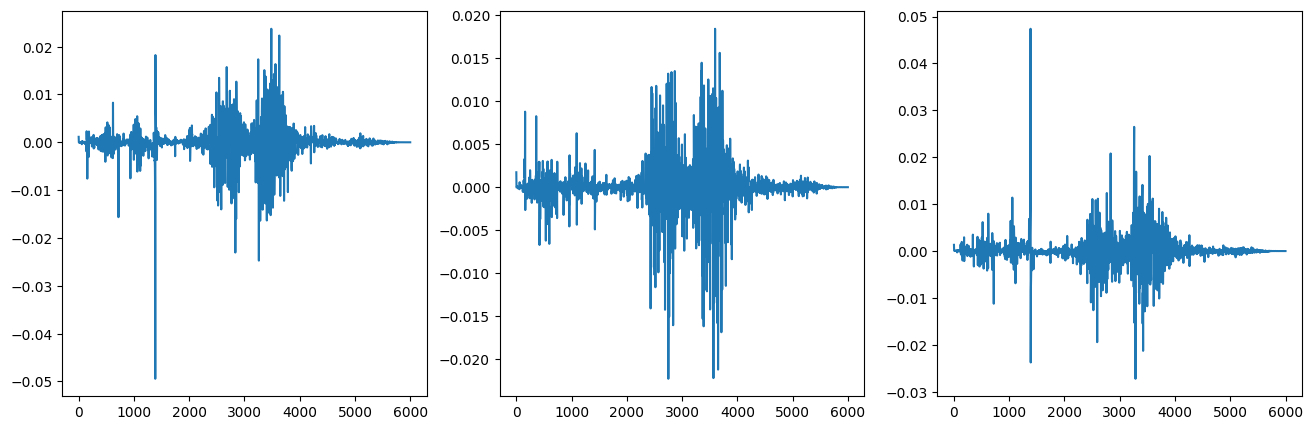

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(vf,Xw[71]) #fallo 6

plt.subplot(132)
plt.plot(vf,Xw[57]) #fallo 6

plt.subplot(133) #fallo 9
plt.plot(vf,Xw[95])

plt.show()

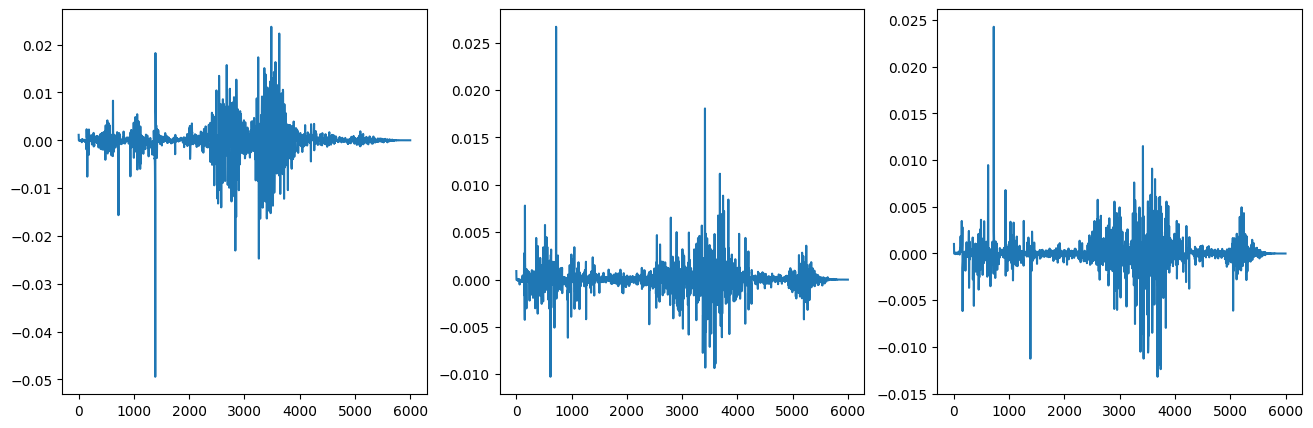

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.plot(vf,Xw[71]) #fallo 6

plt.subplot(132)
plt.plot(vf,Xw[76]) #fallo 9

plt.subplot(133) #fallo 9
plt.plot(vf,Xw[78])

plt.show()

Llegamos hasta este punto, hay muchas señales que son muy similares y por ende arrojan el mismo resultado. Lastimosamente, no supimos cómo solucionarlo. La precisión la pone en aprox. 10% porque solo detecta el 6 de los 10 tipos de errores que hay. Se requieren de técnicas mas avanzadas de tratamiento de datos y señales para obtener una mejor respuesta
